# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import string
import re
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
from gensim.models import FastText, Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Exploratory Data Analysis

In [4]:
df = pd.read_csv('poem.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Genre   150 non-null    object
 1   Poem    150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [6]:
df.shape

(150, 2)

In [7]:
df.head()

,Genre,Poem
0,Music,A woman walks by the bench I’m sitting onwith ...
1,Music,"Because I am a boy, the untouchability of beau..."
2,Music,"Because today we did not leave this world,We n..."
3,Music,"Big Bend has been here, been here. Shouldn’t i..."
4,Music,"I put shells there, along the lip of the road...."


In [8]:
df.Poem[0]

'A woman walks by the bench I’m sitting onwith her dog that looks part Lab, part Buick,stops and asks if I would like to dance.I smile, tell her of course I do. We decideon a waltz that she begins to hum.'

Firstly we must clean the data by

- removing punctuation & special characters & numbers
- making lowecase
- removing tags
- deleting stopwords

In [9]:
stop_words = stopwords.words('english')

In [10]:
def clean_text(text):
  text = text.lower() # making text lowercase
  text = re.sub(r'\d+', '', text) # removing numbers
  text = re.sub(r'[^\w\s]', '', text) # removing special characters
  text = BeautifulSoup(text, "html.parser").get_text() # removing html tags such as <br></br>
  text = " ".join([word for word in text.split() if word not in stop_words]) # removing stopwords
  text = " ".join(word for word in text.split() if len(word) > 2) # removing too short words

  return text

In [11]:
print(clean_text("Have a goOD DaY45 My name IS Ozgur!!"))

good day name ozgur


In [12]:
cleanedPoem = [clean_text(row) for row in df['Poem']]

In [13]:
cleanedPoem[0]

'woman walks bench sitting onwith dog looks part lab part buickstops asks would like dancei smile tell course decideon waltz begins hum'

# Using TF-IDF Vectorizer

In [14]:
tfidf_vectorizer = TfidfVectorizer()

In [15]:
X = tfidf_vectorizer.fit_transform(cleanedPoem)
feature_names = tfidf_vectorizer.get_feature_names_out()

In [16]:
vector_temsili = X.toarray()

In [17]:
df_vectorizer = pd.DataFrame(vector_temsili, columns = feature_names)
df_vectorizer

,abacus,absences,acacia,academic,accelerates,acceleratinglove,accepted,access,ache,acherolled,...,youi,youif,young,youngto,youre,yourtongue,youth,youthe,youththe,yuwhen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.219751,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192353,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [18]:
df_vectorizer.mean(axis = 0)

,0
abacus,0.001533
absences,0.001253
acacia,0.001597
academic,0.001505
accelerates,0.001316
...,...
yourtongue,0.001465
youth,0.003570
youthe,0.002230
youththe,0.001448


In [19]:
tokenized_data = [simple_preprocess(row) for row in cleanedPoem]

# Word2Vec Model

In [20]:
word2vec_model = Word2Vec(sentences = tokenized_data, vector_size = 50, window = 5, min_count = 1, sg = 0)

In [21]:
word_vectors = word2vec_model.wv
words = list(word_vectors.index_to_key)
vectors = [word_vectors[word] for word in words]

In [22]:
pca = PCA(n_components = 2)
reduced_vectors = pca.fit_transform(vectors)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(reduced_vectors)

KMeans(n_clusters=3)

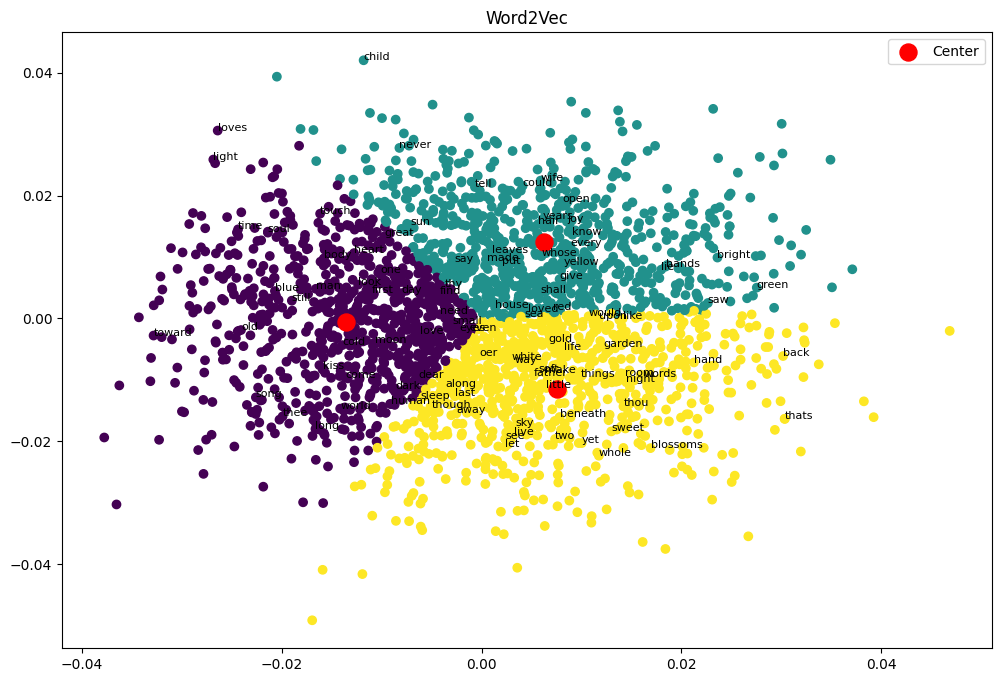

In [23]:
plt.figure(figsize = (12, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c = kmeans.labels_, cmap = "viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = "red", marker = 'o', s = 150, label = "Center")
plt.legend()

for i, word in enumerate(words[:100]):
  plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], word, fontsize = 8)

plt.title('Word2Vec')
plt.savefig("Poem_PCA.png")
plt.show()